In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering 

In [5]:
data = pd.read_csv("/Users/zeynep/Desktop/veriodakliprogramlama/bowldataset kopyası.csv")  

In [6]:
X = data.iloc[:, 4:22]
X.head()
X.isnull().any(axis=1).sum()
features = ['env_HookStart', 'env_HookEnd', 'env_HookShape', 'env_HookPower',
       'env_HookBoard', 'env_MaxHookDistance', 'env_ReadStart',
       'env_BreakPointDistance', 'env_TrueBreakPointDistance',
       'env_BreakPointPosition', 'env_BreakPointLength', 'env_BoardsCrossed',
       'env_RollBoard', 'env_SpeedLossTotal', 'env_SpeedLossHeads',
       'env_SpeedLossMid', 'env_SpeedLossBack', 'env_MaxSpeedLossDistance']
Y = X[features].copy()
Y = Y.values

In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
Y = sc_X.fit_transform(Y)


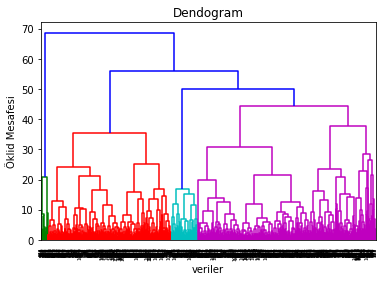

In [8]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(Y, method = 'ward'))
plt.title('Dendogram')
plt.xlabel('veriler')
plt.ylabel('Öklid Mesafesi')
plt.show()

In [9]:
#kümeleme algoritması 
from sklearn.cluster import AgglomerativeClustering
hiyerarsikKumeleyici = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
kume_elemanlari = hiyerarsikKumeleyici.fit_predict(X) 

#kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10) 
#kmeans.fit(data)

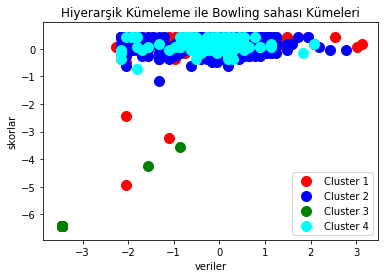

In [10]:
#küme merkezleri 
plt.scatter(Y[kume_elemanlari == 0, 0], Y[kume_elemanlari == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Y[kume_elemanlari == 1, 0], Y[kume_elemanlari == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(Y[kume_elemanlari == 2, 0], Y[kume_elemanlari == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(Y[kume_elemanlari == 3, 0], Y[kume_elemanlari == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Hiyerarşik Kümeleme ile Bowling sahası Kümeleri')
plt.xlabel('veriler')
plt.ylabel('skorlar')
plt.legend()
plt.show()

In [15]:
z = data.iloc[:,22:35].values #bağımsız değişkenler
k = data.iloc[:,35].values #bağımlı değişken
print(k)

[18.  15.4 13.4 ... 12.4  5.9 15.3]
